In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
sns.set_theme()

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.utils import get_config, read_file

In [4]:
config = get_config.read_yaml()
symbols = config['data']['symbols']
symbol = symbols[0]
symbol

'ETH/USDT'

In [5]:
data = read_file.read_featured_training_data(symbol)
data

Reading Featured Training data: ETH !
Successfully read: ETH !


,open,high,low,close,volume,rsi,sma-50,sma-100,sma-200,ema-50,ema-100,ema-200,atr,adx
timestamp,,,,,,,,,,,,,,
2020-05-28 00:00:00,208.29,208.97,206.23,206.39,57174.58460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-28 04:00:00,206.36,206.98,204.74,205.32,58091.35138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-28 08:00:00,205.32,207.80,204.67,207.57,63672.58000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-28 12:00:00,207.59,214.65,207.35,214.26,206879.94719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-28 16:00:00,214.26,215.58,213.39,214.66,121482.63358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-29 04:00:00,3386.06,3408.32,3381.56,3399.72,18952.95950,47.608675,3428.3040,3474.8772,3616.21060,3431.772075,3478.269080,3502.939085,43.282212,18.399477
2024-06-29 08:00:00,3399.72,3406.05,3387.20,3400.45,15348.80600,47.755645,3426.2890,3473.5916,3613.61495,3430.543758,3476.728108,3501.919293,41.537054,17.366498
2024-06-29 12:00:00,3400.45,3403.20,3383.00,3394.62,12952.05660,46.630594,3424.6814,3471.9366,3611.01800,3429.134984,3475.102205,3500.851638,40.012979,16.556739


In [6]:
# define a function to plot various datafields
def plot_df(df, kind=None):
    if kind is None:
        df.plot(figsize = (15,8), fontsize=12) # plots the graph with specified plot and font size
    else:
        df.plot(kind=kind, figsize = (15,8), fontsize=12, bins=100)
    plt.legend(fontsize = 12) # shows legends
    plt.show() # makes the plot visible

In [7]:
# Handling NaN values in the dataframe (WIP)
data = data[data.index >= config['data']['begin_date']].copy()
data = data.ffill()
data

,open,high,low,close,volume,rsi,sma-50,sma-100,sma-200,ema-50,ema-100,ema-200,atr,adx
timestamp,,,,,,,,,,,,,,
2020-07-01 00:00:00,225.59,226.00,224.16,225.44,65497.22434,46.581338,230.7186,231.0886,234.99935,228.493657,230.821676,234.170638,3.136131,18.456022
2020-07-01 04:00:00,225.45,226.35,224.80,225.58,54059.28230,47.004536,230.3676,230.9905,235.02620,228.379396,230.717881,234.085159,3.022836,18.074766
2020-07-01 08:00:00,225.58,228.91,225.56,227.66,100051.80130,52.966371,230.0664,230.9175,235.05505,228.351184,230.657329,234.021227,3.046205,17.011003
2020-07-01 12:00:00,227.66,229.42,226.80,229.42,94187.61415,57.339581,229.7718,230.8940,235.09540,228.393099,230.632827,233.975444,3.015762,16.230614
2020-07-01 16:00:00,229.42,232.71,228.70,231.10,140283.09676,61.061387,229.5264,230.9479,235.15570,228.499252,230.642078,233.946833,3.086779,16.662574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-29 04:00:00,3386.06,3408.32,3381.56,3399.72,18952.95950,47.608675,3428.3040,3474.8772,3616.21060,3431.772075,3478.269080,3502.939085,43.282212,18.399477
2024-06-29 08:00:00,3399.72,3406.05,3387.20,3400.45,15348.80600,47.755645,3426.2890,3473.5916,3613.61495,3430.543758,3476.728108,3501.919293,41.537054,17.366498
2024-06-29 12:00:00,3400.45,3403.20,3383.00,3394.62,12952.05660,46.630594,3424.6814,3471.9366,3611.01800,3429.134984,3475.102205,3500.851638,40.012979,16.556739


In [8]:
scaler = MinMaxScaler()
data_scaled = data.copy()
scaler.fit(data.loc[:,:])
data_scaled.loc[:,:] = scaler.transform(data.loc[:,:])
data_scaled


,open,high,low,close,volume,rsi,sma-50,sma-100,sma-200,ema-50,ema-100,ema-200,atr,adx
timestamp,,,,,,,,,,,,,,
2020-07-01 00:00:00,0.000158,0.000034,0.000283,0.000123,0.042655,0.478901,0.001066,0.000296,0.000394,0.000242,0.000391,0.000445,0.003929,0.166406
2020-07-01 04:00:00,0.000128,0.000110,0.000424,0.000154,0.035187,0.483911,0.000987,0.000274,0.000400,0.000216,0.000367,0.000424,0.003560,0.160435
2020-07-01 08:00:00,0.000156,0.000661,0.000591,0.000604,0.065214,0.554499,0.000919,0.000257,0.000407,0.000210,0.000353,0.000408,0.003636,0.143776
2020-07-01 12:00:00,0.000606,0.000771,0.000863,0.000984,0.061385,0.606277,0.000853,0.000251,0.000417,0.000219,0.000347,0.000397,0.003536,0.131555
2020-07-01 16:00:00,0.000987,0.001480,0.001280,0.001348,0.091479,0.650343,0.000798,0.000264,0.000431,0.000243,0.000349,0.000390,0.003768,0.138319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-29 04:00:00,0.683935,0.685560,0.693684,0.686923,0.012268,0.491064,0.717952,0.748766,0.805454,0.726841,0.754743,0.799492,0.134918,0.165520
2024-06-29 08:00:00,0.686890,0.685071,0.694923,0.687081,0.009915,0.492804,0.717500,0.748469,0.804836,0.726563,0.754385,0.799243,0.129224,0.149343
2024-06-29 12:00:00,0.687048,0.684457,0.694000,0.685820,0.008350,0.479484,0.717140,0.748087,0.804218,0.726243,0.754007,0.798982,0.124251,0.136662


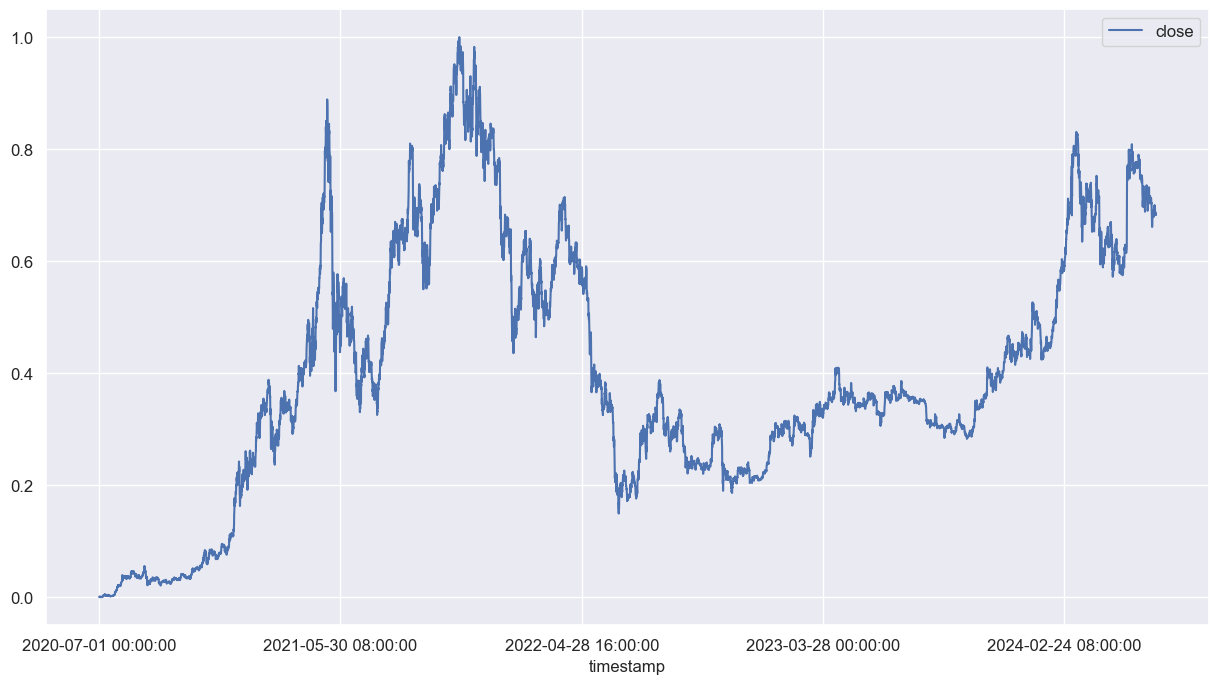

In [9]:
plot_df(data_scaled['close'])